<a href="https://colab.research.google.com/github/Ajay2003-prog/Sales-Performance-Market-Intelligence-Report/blob/main/Superstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/Sample - Superstore.xls", sheet_name="Orders" )

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.to_csv("superstore_orders.csv",index=False)

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Total Sales & Profit

In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_sales, total_profit

(np.float64(2297200.8603000003), np.float64(286397.0216999999))

Sales By category

In [ ]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [ ]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


Sub Category Analysis

In [ ]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit

,Profit
Sub-Category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569
Labels,5546.2540
Art,6527.7870
Envelopes,6964.1767
Furnishings,13059.1436


Regional Performance

In [ ]:
df.groupby('Region')['Sales'].sum()

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


Profit by Region

In [ ]:
df.groupby('Region')['Profit'].sum()

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


Convert Dates

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month


Yearly Sales Trend


In [ ]:
df.groupby('Order_Year')['Sales'].sum()

,Sales
Order_Year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


Discount vs Profit

In [ ]:
df.groupby('Discount')['Profit'].mean()

,Profit
Discount,
0.00,66.900292
0.10,96.055074
0.15,27.288298
0.20,24.702572
0.30,-45.679636
0.32,-88.560656
0.40,-111.927429
0.45,-226.646464
0.50,-310.703456


Visualizations

Category Sales Bar Chart

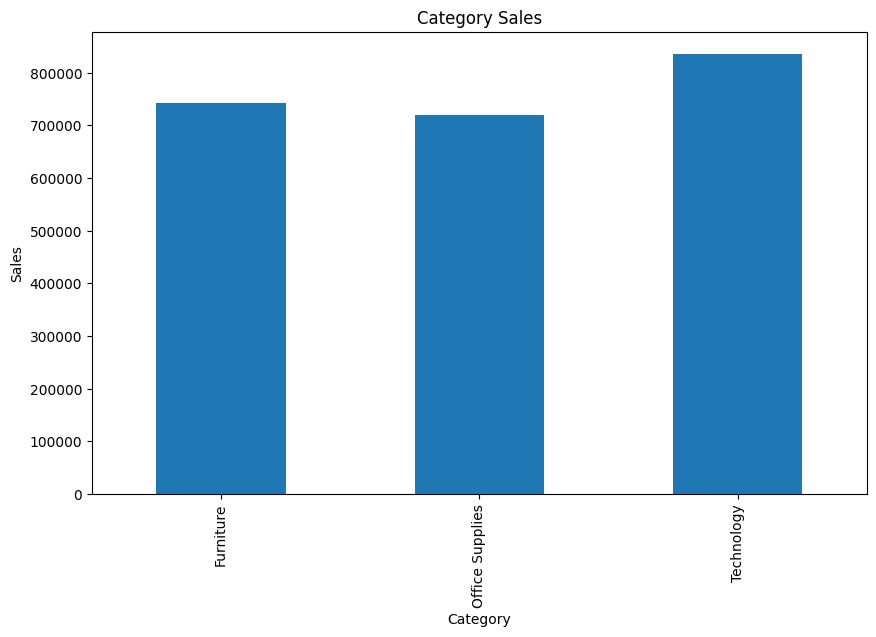

In [ ]:
df.groupby('Category')['Sales'].sum().plot(kind='bar',figsize=(10,6))
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category Sales')
plt.show()

Discount Vs Profit Scatter

Text(0.5, 1.0, 'Discount Vs Profit')

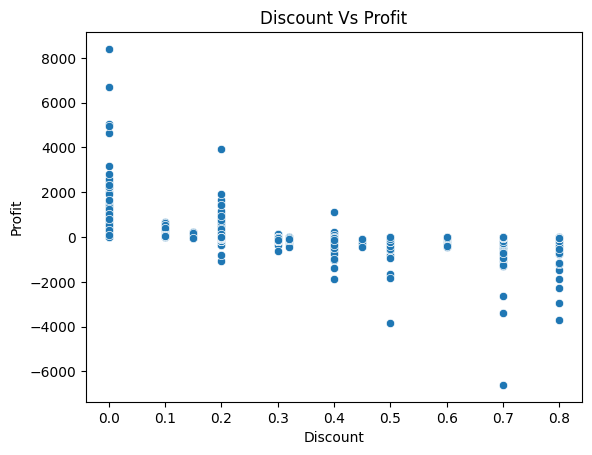

In [ ]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount Vs Profit')

In [ ]:
df.to_csv("superstore_orders_clean.csv",index=False)

In [ ]:
df = pd.read_csv("/content/superstore_orders_clean.csv")

In [ ]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11


In [ ]:
df.columns = df.columns.str.lower()
df.columns.values

array(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city',
       'state', 'postal code', 'region', 'product id', 'category',
       'sub-category', 'product name', 'sales', 'quantity', 'discount',
       'profit', 'order_year', 'order_month'], dtype=object)

In [ ]:
df = df.rename(columns={'row id':'row_id',
                        'order id':'order_id',
                        'order date':'order_date',
                        'ship date':'ship_date',
                        'ship mode':'ship_mode',
                        'customer id':'customer_id',
                        'customer name':'customer_name',
                        'segement':'segment',
                        'country':'country',
                        'city':'city',
                        'state':'state',
                        'postal code':'postal_code',
                        'product id':'product_id',
                        'sub-category':'sub_category',
                        'product name':'product_name',
                        })


In [ ]:
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,order_year,order_month
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


In [ ]:
df.to_csv('superstore_clean.csv')

In [ ]:


# Load your CSV file
df = pd.read_csv("/content/superstore_clean.csv")

# Round up (ceil) the specified columns
cols_to_round = ["sales", "profit", "discount"]
df[cols_to_round] = df[cols_to_round].apply(np.ceil)


print(df.head())



   Unnamed: 0  row_id        order_id  order_date   ship_date       ship_mode  \
0           0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class   
1           1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class   
2           2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class   
3           3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class   
4           4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class   

  customer_id    customer_name    segment        country  ...  \
0    CG-12520      Claire Gute   Consumer  United States  ...   
1    CG-12520      Claire Gute   Consumer  United States  ...   
2    DV-13045  Darrin Van Huff  Corporate  United States  ...   
3    SO-20335   Sean O'Donnell   Consumer  United States  ...   
4    SO-20335   Sean O'Donnell   Consumer  United States  ...   

        product_id         category  sub_category  \
0  FUR-BO-10001798        Furniture     Bookcases   
1  FUR-CH-100004

In [ ]:
df.to_csv('superstore_clean(1).csv')

In [ ]:
df = pd.read_csv('/content/project_2.csv', encoding='utf-8', on_bad_lines='skip')

In [ ]:
df = df.dropna(how='all')

In [ ]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

In [ ]:
df = df.fillna('')

In [ ]:
df.to_csv('project_2(1).csv', index=False,encoding="utf-8",lineterminator="\r\n")


In [ ]:
df.shape

(9994, 19)

In [ ]:
print(df.dtypes)

order_id         object
order_date       object
ship_date        object
customer_id      object
customer_name    object
segment          object
city             object
state            object
region           object
product_id       object
category         object
sub_category     object
product_name     object
sales             int64
quantity          int64
discount          int64
profit            int64
order_year        int64
order_month       int64
dtype: object


In [ ]:
df.to_csv('project_2_cleaned.csv', index=False, encoding='utf-8')


In [ ]:
df = pd.read_csv('/content/project_2_cleaned.csv')

In [ ]:
import os
os.makedirs('C:/MySQLImports', exist_ok=True)


In [7]:
from google.colab import files
files.download("/content/project_2(1).csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>